## Softmax Regression

Multi-class classification using softmax regression techniques has been illustrated in this notebook with each mathematical step implemented from scratch.
* Please go through this  reference which will help to understand the theory of Softmax Regression.
* Reference : http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/
* http://cs229.stanford.edu/notes2020spring/cs229-notes1.pdf
* sklearn iris dataset has  been used which has 4 features and 3 classes.

### Import  Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Load Data

To create training and testing set we can use sklearn train_test_split feature. 

In [2]:
data = load_iris()
#create train and test set for input and output, test_size represent the % of test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25)

# no of rows
m = X_train.shape[0]

#As we are using linearity, For vector multiplication adding a column in X with all the value 1
X = np.hstack((np.ones((m,1)),X_train))
print(X[:5]) # Checking first 5 rows of X matrix

[[1.  4.9 3.  1.4 0.2]
 [1.  6.3 2.8 5.1 1.5]
 [1.  5.6 2.7 4.2 1.3]
 [1.  6.3 3.4 5.6 2.4]
 [1.  5.  3.5 1.3 0.3]]


As we have 3 classes for easier computation we will convert our output vector in matrix where no of columns is equal to the no of classes. The values in the matrix will be 0 or 1. For instance the rows where we have output 2 the column 2 will contain 1 and rest all 0

In [3]:
k=np.unique(y_train,return_counts=True)
Y=np.zeros((m,len(k[0])))
for i in range(m):
    Y[i,y_train[i]]=1
print(Y[:5]) # Checking first 5 rows of Y matrix

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### Softmax Regression Implementation

### Softmax Function

In [4]:
## Assuming theta
np.random.seed(0)
theta = np.random.randn(3,5)
theta

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323]])

In [5]:
## Calculating  matrix product of theta and X. Only 5 rows of X is taken to visualize the process and calculation 
Z=np.dot(X[:5], theta.T)
Z

array([[10.1717987 ,  3.16169705,  9.8122146 ],
       [21.25540142,  4.67396058, 12.72320973],
       [18.48710209,  4.03481167, 11.43083434],
       [24.643893  ,  4.90107548, 13.64014678],
       [10.66384989,  3.23240902, 10.37037964]])

### Understanding Softmax function by stepwise implementation  and then making a function:

In [6]:
np.exp(Z) ## Calculating Exponential

array([[2.61550795e+04, 2.36106303e+01, 1.82553707e+04],
       [1.70256439e+09, 1.07121165e+02, 3.35443806e+05],
       [1.06867691e+08, 5.65322726e+01, 9.21188012e+04],
       [5.04320638e+10, 1.34434283e+02, 8.39151702e+05],
       [4.27810227e+04, 2.53406296e+01, 3.19005853e+04]])

In [7]:
np.exp(Z).sum(axis=1,keepdims=True) ## Calculating sum along the axis=1 (along the column from left to right)

array([[4.44340608e+04],
       [1.70289994e+09],
       [1.06959866e+08],
       [5.04329031e+10],
       [7.47069486e+04]])

In [8]:
result= np.exp(Z)/np.exp(Z).sum(axis=1,keepdims=True) # Dividing exponential with sum
result
## Finally this is the result of softmax function

array([[5.88626811e-01, 5.31363326e-04, 4.10841826e-01],
       [9.99802953e-01, 6.29051434e-08, 1.96983862e-04],
       [9.99138225e-01, 5.28537241e-07, 8.61246413e-04],
       [9.99983358e-01, 2.66560667e-09, 1.66389728e-05],
       [5.72651186e-01, 3.39200437e-04, 4.27009614e-01]])

In [9]:
## Checking its sum, must be equal to 1 
np.sum(result,axis=1,keepdims=True) # We are right

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### Finally making Softmax function

In [10]:
def softmax(z):
    return np.exp(z) / np.exp(z).sum(axis=1,keepdims=True)

In [11]:
## Checking
np.random.seed(0)
theta = np.random.randn(3,5)
Z=np.dot(X[:5], theta.T)
h_out=softmax(Z)
h_out

array([[5.88626811e-01, 5.31363326e-04, 4.10841826e-01],
       [9.99802953e-01, 6.29051434e-08, 1.96983862e-04],
       [9.99138225e-01, 5.28537241e-07, 8.61246413e-04],
       [9.99983358e-01, 2.66560667e-09, 1.66389728e-05],
       [5.72651186e-01, 3.39200437e-04, 4.27009614e-01]])

In [12]:
h_out.shape

(5, 3)

### Cost Function
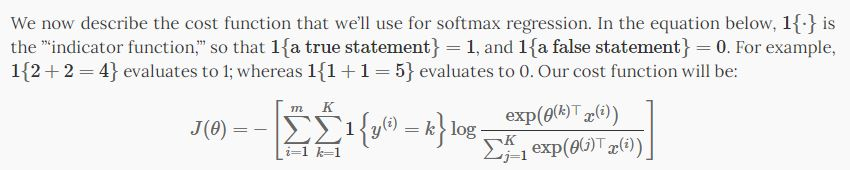

In [13]:
cost = -np.sum(Y[:5] * np.log(h_out)) / m ## To understand the concept we have taken only 5 rows of X 
cost                                      ## and so taking only first 5 value of Y
                                          ## m should also be only 5 but let it be so.

0.3131852283195557

### Gradient Calculation of Softmax Cost Function
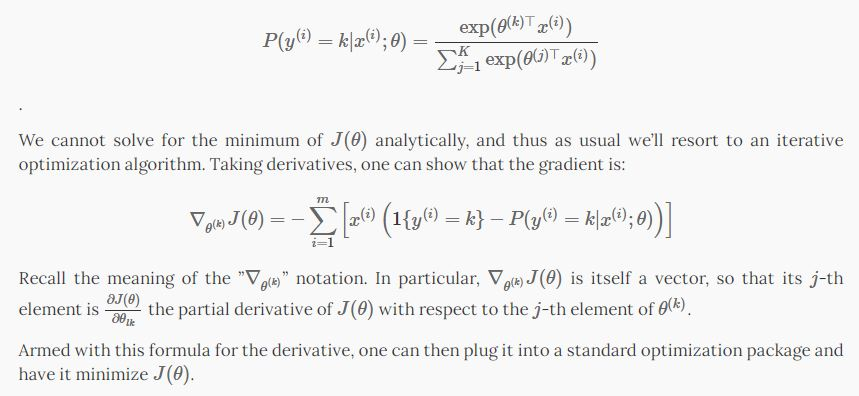

In [14]:
grad=np.dot((h_out-Y[:5]).T, X[:5])
print(grad)
print(grad.shape)

[[ 2.16020253 14.04135512  6.16722448 13.76380649  4.9880649 ]
 [-0.99912884 -5.59569694 -2.6972171  -4.19881258 -1.29979118]
 [-1.16107369 -8.44565818 -3.47000738 -9.56499391 -3.68827372]]
(3, 5)


### Now applying Gradient Descent

In [15]:
# This is one step of Gradient Descent
a=0.001 # learning rate
theta=theta-a/m*grad  # Gradient Descent
theta 

array([[ 1.76403306,  0.40003184,  0.97868292,  2.24077031,  1.86751345],
       [-0.97726896,  0.95013838, -0.15133313, -0.10318136,  0.41061011],
       [ 0.14405394,  1.45434891,  0.76106871,  0.12176042,  0.44389616]])

### Final Implementation of Gradient Descent
* Now Writing above piecewise code into one cell and making function which gives final optimized weights(theta) and cost for each iteration

In [16]:
#define theta with size 3,5 as there are 3 classes and 5 features, lets take the initial value as 0
def Softmax_reg(X_train,y_train,learning_rate= 0.001,iteration=50000):
    
    # Prepartion of X_train 
    
    # no of rows
    num_rows = X_train.shape[0]
    # As we are using linearity, For vector multiplication adding a column in X with all the value 1
    X = np.hstack((np.ones((num_rows,1)),X_train))
    
    # Prepartion of y_train 
    k=np.unique(y_train,return_counts=True)
    Y=np.zeros((num_rows,len(k[0])))
    for i in range(num_rows):
        Y[i,y_train[i]]=1
        
    
    #  Initializatio of theta
    m,n=X.shape
    _,k=Y.shape
    theta = np.random.randn(k,n)
    
    # to store cost values
    cost_for_iter = []
    
    # Gradient Descent inside loop for multiple updation of theta
    for i in range(iteration):
        Z= np.dot(X, theta.T)
        h_out = softmax(Z)
        
        cost = -np.sum(Y * np.log(h_out)) / m    # Cost calculation
        cost_for_iter.append(cost)
            
        grad=np.dot((h_out-Y).T, X)         # gradient calculation  
  
        theta = theta - (learning_rate/m)*grad     # Gradient Descent
    return theta,cost_for_iter

In [17]:
theta,cost=Softmax_reg(X_train,y_train,learning_rate= 0.001,iteration=50000)

In [18]:
print(theta,'\n')
#print(cost)

[[ 0.48798521  1.65395067  1.12503118 -1.65757424 -1.62351838]
 [-2.0302598   1.3754718   0.31626048 -0.11901173  1.33178383]
 [-2.13140657 -0.83596629 -0.96919758  2.88026786  3.1767522 ]] 



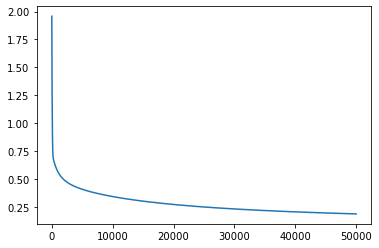

In [19]:
plt.plot(cost)

### Prediction on test data and Implementing inside a function

In [20]:
m_test = X_test.shape[0]

X_test_vec = np.hstack((np.ones((m_test,1)),X_test))

probab = softmax(np.dot(X_test_vec,theta.T))
predict = np.argmax(probab, axis=1)

In [21]:
predict

array([2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

In [22]:
def predict(X_test,theta):
    m_test = X_test.shape[0]
    X_test = np.hstack((np.ones((m_test,1)),X_test))
    probab = softmax(np.dot(X_test,theta.T))
    predict = np.argmax(probab, axis=1)
    return predict

In [23]:
y_pred=predict(X_test,theta)
y_pred

array([2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

### Comparing our model with scikit library
Lets compare our model with the Scikit logistic model.Scikit logistic model is self sufficient to handle multiclass classification.

In [24]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

#train the model with training data
regr = linear_model.LogisticRegression(max_iter=1000)
regr.fit(X_train,y_train)

#Predict our test data
y_pred_sklearn = regr.predict(X_test)

# Accuracy score Sklearn
print(" Sklearn Accuracy score: %.2f" % accuracy_score(y_pred_sklearn, y_test))

# Accuracy score Our Model
print(" Our Model Accuracy score: %.2f" % accuracy_score(y_pred, y_test))


 Sklearn Accuracy score: 1.00
 Our Model Accuracy score: 1.00


#### * https://github.com/Rami-RK
#### * https://www.linkedin.com/in/ramendra-kumar-57334478/